In [3]:
import sympy
from sympy import *
sympy.init_printing()
s = Symbol('s')

In [4]:
from control import matlab
import scipy
import matplotlib.pyplot as plt


In [5]:
def stepResponse(Ts,*args,**kwargs):
    num = Poly(Ts.as_numer_denom()[0],s).all_coeffs()
    den = Poly(Ts.as_numer_denom()[1],s).all_coeffs()
    tf = matlab.tf(map(float,num),map(float,den))
    y,t = matlab.step([tf],*args,**kwargs)
    plt.plot(t,y)
    plt.title("Step Response")
    plt.grid()
    plt.xlabel("time (s)")
    plt.ylabel("y(t)")
    info ="OS: %f%s"%(round((y.max()/y[-1]-1)*100,2),'%')
    try:
        i10 = next(i for i in range(0,len(y)-1) if y[i]>=y[-1]*.10)
        Tr = round(t[next(i for i in range(i10,len(y)-1) if y[i]>=y[-1]*.90)]-t[i10],2)
    except StopIteration:
        Tr = "unknown"
    try:
        Ts = round(t[next(len(y)-i for i in range(2,len(y)-1) if abs(y[-i]/y[-1])>1.02)]-t[0],2)
    except StopIteration:
        Ts = "unknown"     
    info += "\nTr: %s"%(Tr)
    info +="\nTs: %s"%(Ts)
    #print info
    plt.legend([info],loc=4)
    plt.show()

In [6]:
G1 = 1/(s+1)

In [7]:
G2 = 10*s/(s+10)

In [8]:
G2

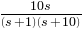

In [9]:
G=G1*G2

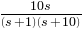

In [14]:
G.simplify()

In [16]:
stepResponse(G1)

TypeError: The numerator and denominator inputs must be scalars or vectors (for
SISO), or lists of lists of vectors (for SISO or MIMO).